In [ ]:
# Standard scientific Python imports
import matplotlib.pyplot as plt
import pandas as pd

# Import datasets, classifiers and performance metrics
from sklearn import datasets, metrics, svm
from sklearn.model_selection import train_test_split



# **1 - Cancer Classification Using SVM (Binary Classification)**
`breast_cancer_dataset` is a dataset of different patients, showing the different characteristics of their cells which was suspected to be cancerous. After thorough diagnosis, it was determined whether it was **Malignant (fatal)** or `Benign (not so harmful)`. Now we will be using Support Vector Machine to classify the cells between Malignant and Benign using Python. Then we will match our predictions with original data to check the model's accuracy

![What does breast cancer look like on mammography](https://healthimaging.com/sites/default/files/styles/gallery/public/2022-09/Series%20on%20annual%20mammograms%20showing%20cancer%20formation_RSNA.jpg.webp?itok=7rAqFvmS)

[image source](https://healthimaging.com/topics/medical-imaging/womens-imaging/breast-imaging/photo-gallery-what-does-breast-cancer-look-mammography)

In [ ]:
# Import Cancer data drom the Sklearn library
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [ ]:
# Read the DataFrame, first using the feature data
df = pd.DataFrame(data.data, columns=data.feature_names)

# Add a target column, and fill it with the target data
df['target'] = data.target
# Show the first five rows
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


If the target column is `1` it means it's a **malignant (fatal)** and if it's `0` it means **Benign (not so harmful)**


<Axes: xlabel='mean area', ylabel='mean smoothness'>

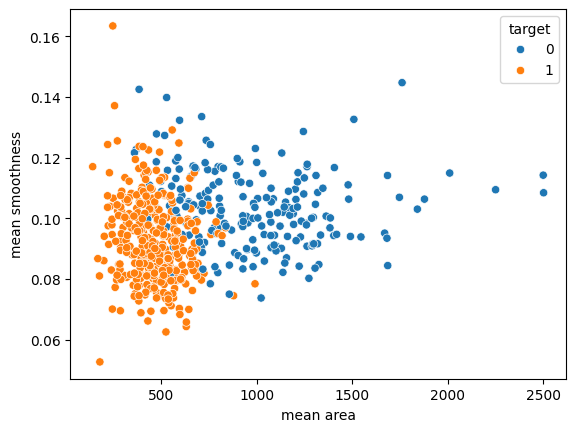

In [ ]:
import seaborn as sns

sns.scatterplot(x = 'mean area', y = 'mean smoothness', hue = 'target', data = df)

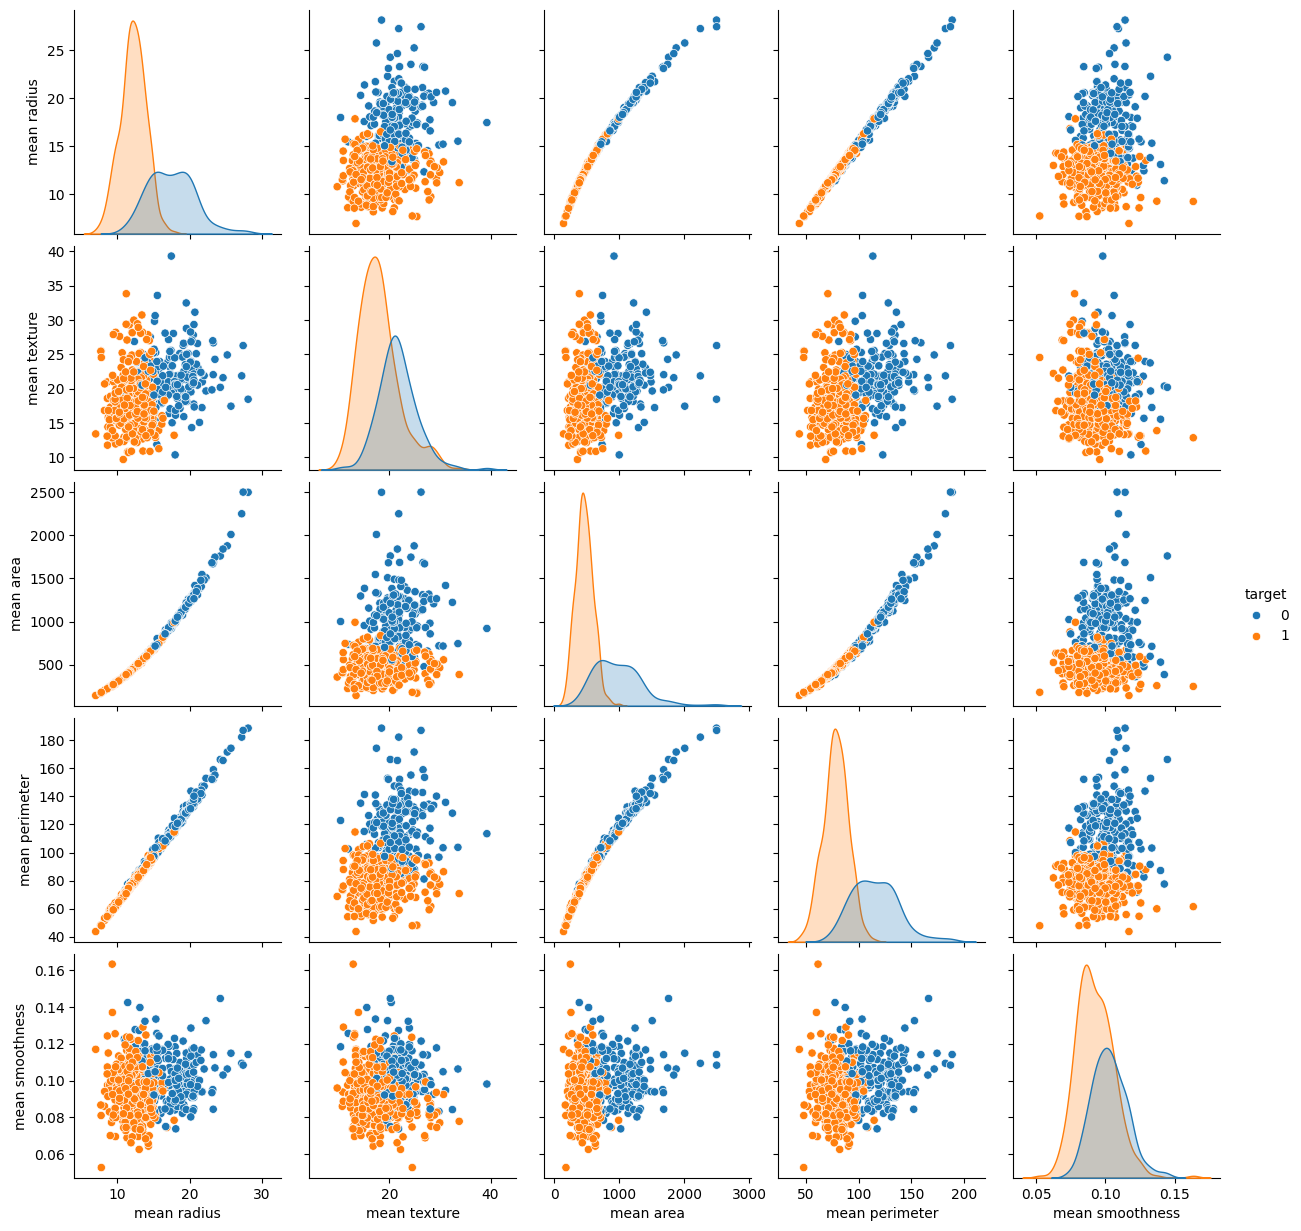

In [ ]:
sns.pairplot(df, hue = 'target', vars = ['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness'] )

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

X = df[['mean radius', 'mean texture', 'mean area', 'mean perimeter', 'mean smoothness']]
Y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state=5)

svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

<Axes: >

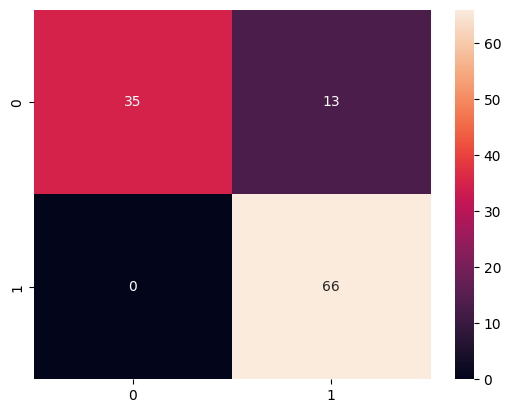

In [ ]:
y_predict = svc_model.predict(X_test)

cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.73      0.84        48
           1       0.84      1.00      0.91        66

    accuracy                           0.89       114
   macro avg       0.92      0.86      0.88       114
weighted avg       0.90      0.89      0.88       114



### **Improving the model using feature scaling**


In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

svc_model_after_scaling = SVC()
svc_model_after_scaling.fit(X_train, y_train)

SVC()

<Axes: >

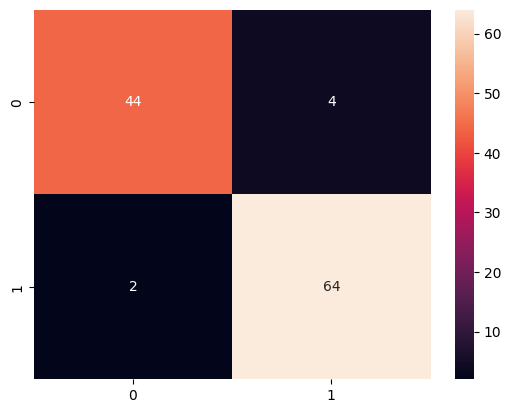

In [ ]:
y_predict = svc_model_after_scaling.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        48
           1       0.94      0.97      0.96        66

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.95       114
weighted avg       0.95      0.95      0.95       114



## HOW CAN WE ENHANCE THE MODEL PERFORMANCE?

In [ ]:
# test different Strategies here

# **2 - Recognizing Hand-Written Digits (Multi-class classification task)**
This example shows how SVM can be used to recognize images of hand-written digits, from 0-9.

### Digits dataset
The digits dataset consists of 8x8 pixel images of digits. The **images** attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use these arrays to visualize the first 4 images. The **target** attribute of the dataset stores the digit each image represents and this is included in the title of the 4 plots below.

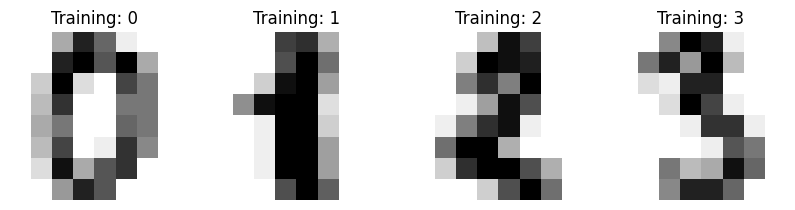

In [ ]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

### **Classification**
To apply a classifier on this data, we need to flatten the images, turning each 2-D array of grayscale values from shape `(8, 8)` into shape `(64,)`. Subsequently, the entire dataset will be of shape `(n_samples, n_features)`, where `n_samples` is the number of images and `n_features` is the total number of pixels in each image.

We can then split the data into train and test subsets and fit a support vector classifier on the train samples. The fitted classifier can subsequently be used to predict the value of the digit for the samples in the test subset.

In [ ]:
# flatten the images
n_samples = len(digits.images)
print(n_samples)
X = digits.images.reshape((n_samples, -1))
Y = digits.target

# Create a classifier: a support vector classifier
clf = svm.SVC(gamma=0.001)

# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, shuffle=False
)

# Learn the digits on the train subset
clf.fit(X_train, y_train)

# Predict the value of the digit on the test subset
predicted = clf.predict(X_test)

1797


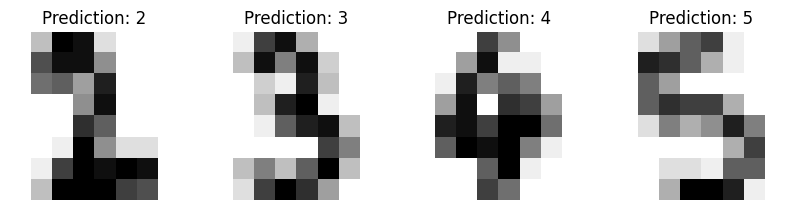

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

Confusion matrix:
[[34  0  0  0  1  0  0  0  0  0]
 [ 0 36  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  2  0  1  4  0]
 [ 0  0  0  0 34  0  0  0  2  1]
 [ 0  0  0  0  0 37  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  0]
 [ 0  1  0  0  0  0  0  0 31  1]
 [ 0  0  0  1  0  1  0  0  0 35]]


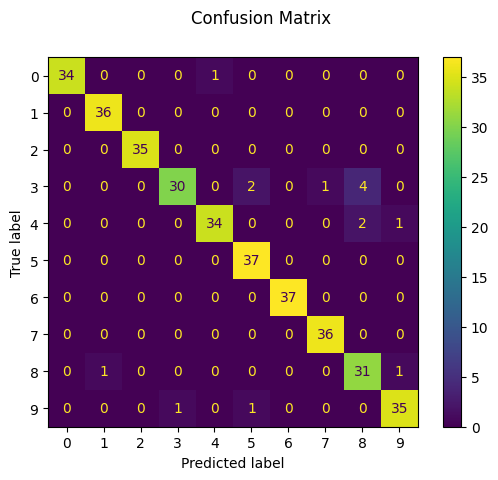

In [ ]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [ ]:
# Classification report
report = metrics.classification_report(y_test, predicted)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.97      1.00      0.99        36
           2       1.00      1.00      1.00        35
           3       0.97      0.81      0.88        37
           4       0.97      0.92      0.94        37
           5       0.93      1.00      0.96        37
           6       1.00      1.00      1.00        37
           7       0.97      1.00      0.99        36
           8       0.84      0.94      0.89        33
           9       0.95      0.95      0.95        37

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



In [ ]:
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# ... and predicting
y_test_hat_linear = svm_linear.predict(X_test)
accuracy_linear = metrics.accuracy_score(y_test_hat_linear, y_test)
print(f'Linear SVM achieved {round(accuracy_linear * 100, 1)}% accuracy.')

Linear SVM achieved 93.1% accuracy.


In [ ]:
# Estimating a polynomial SVM of degree 2
svm_poly = svm.SVC(kernel='poly', degree=2)
svm_poly.fit(X_train, y_train)

# ... and predicting
y_test_hat_poly = svm_poly.predict(X_test)
accuracy_poly = metrics.accuracy_score(y_test_hat_poly, y_test)
print(
    f'Polynomial (of degree 2) SVM achieved '
    f'{round(accuracy_poly * 100, 1)}% accuracy.'
)

Polynomial (of degree 2) SVM achieved 94.2% accuracy.


In [ ]:
# Estimating a radial basis function SVM
svm_rbf = svm.SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)

# ... and predicting
y_test_hat_rbf = svm_rbf.predict(X_test)
accuracy_rbf = metrics.accuracy_score(y_test_hat_rbf, y_test)
print(f'RBF SVM achieved {round(accuracy_rbf * 100, 1)}% accuracy.')

RBF SVM achieved 94.2% accuracy.


## Excercise: Iris Flower Classification
Load the Iris dataset
The Iris dataset is a well-known dataset for machine learning and
contains measurements of iris flowers. It consists of 150 samples and 4 features for each sample, making it suitable for classification tasks.

![](https://camo.githubusercontent.com/a606ca5baf004d747b29dcd8e852bf5d9f7cded62aee4375bcf301b6bd3ab574/68747470733a2f2f7777772e656d6265646465642d726f626f746963732e636f6d2f77702d636f6e74656e742f75706c6f6164732f323032322f30312f497269732d446174617365742d436c617373696669636174696f6e2d31303234783336372e706e67)


Train a SVM model to classify iris flowers. Try to optimize the performance of your model by trying different kernels `(linear, poly, and rbf)`, different values of `C`, different decision function `(ovr or ovo)`, and perhaps even other stuff. You can find a full list of options to tune at https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html.

In [ ]:
iris = datasets.load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr